DSBDAL Assignment 2 <br>
Shrikrushna Zirape <br>
31284 N2 batch

# Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using Python.
<hr>
<ol>
    <li>
        Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
    </li>
    <li>
        Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
    </li>
    <li>
        Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.
    </li>
    <ol>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("StudentsPerformance_modified.csv")
data.shape

(1000, 8)

In [3]:
data.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [5]:
data.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [6]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [7]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [8]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [9]:
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [10]:
data['math score'].unique()

array(['72', '69', '90', '47', '76', '71', '88', '40', '64', '38', '58',
       '65', '78', '50', nan, '74', '73', '67', '70', '62', '63', '56',
       '81', '75', '57', '55', '53', '59', '66', '82', '77', '33', '52',
       '0', '79', '39', '45', '60', '61', '41', '49', '44', '30', '80',
       '42', '27', '43', '68', '85', '98', '87', '54', '51', '99', '84',
       '91', '83', '89', '22', '100', '96', '94', '46', '97', '48', '35',
       '34', '86', '92', '37', '28', '24', '113', '123', '?', '-89', '26',
       '334', '95', '36', '29', '32', '93', '19', '23', '8'], dtype=object)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [12]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [13]:
data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [14]:
data2 = data
data2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


### Converting Categorical values into Quantitative Values

In [15]:
encoder = LabelEncoder()
data2['parental level of education'] = encoder.fit_transform(data2['parental level of education'])
data2['test preparation course'] = encoder.fit_transform(data2['test preparation course'])
data2['lunch'] = encoder.fit_transform(data2['lunch'])

In [16]:
data2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1,1,1,72,72.0,74.0
1,female,group C,4,1,0,69,90.0,88.0
2,female,group B,3,1,1,90,95.0,93.0
3,male,group A,0,0,1,47,57.0,44.0
4,male,group C,4,1,1,76,78.0,75.0


## Handling Missing Values

In [17]:
data2.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [19]:
import missingno as msno

<AxesSubplot:>

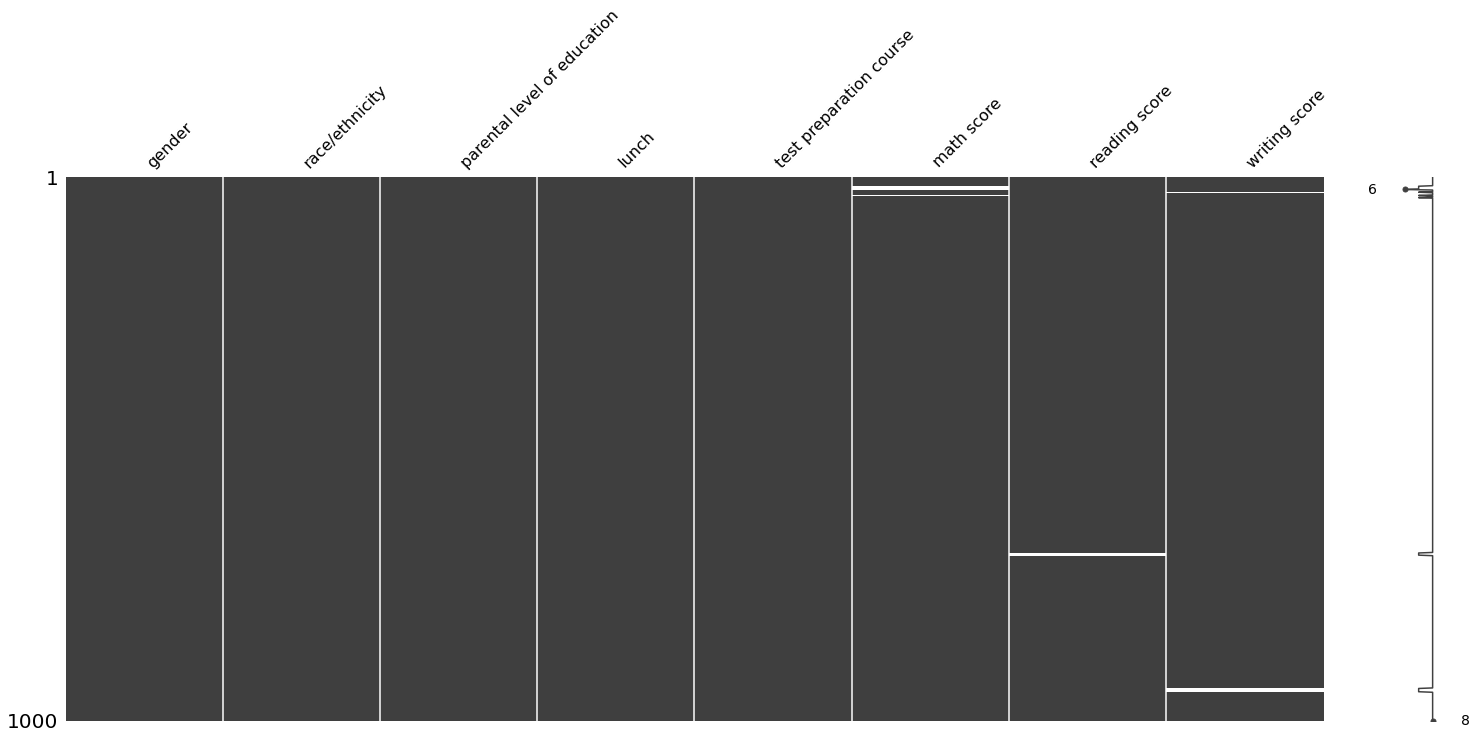

In [20]:
msno.matrix(data2)

In [21]:
data2.dtypes

gender                          object
race/ethnicity                  object
parental level of education      int32
lunch                            int32
test preparation course          int32
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [25]:
data2['math score'] = data2["math score"].apply(pd.to_numeric, errors='coerce')

In [26]:
data2['reading score']=data2['reading score'].fillna(data2['reading score'].median())

In [27]:
data2['writing score']=data2['writing score'].fillna(data2['writing score'].median())

In [28]:
data2['math score']=data2['math score'].fillna(data2['math score'].median())

In [29]:
data2.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [30]:
data2.dtypes

gender                          object
race/ethnicity                  object
parental level of education      int32
lunch                            int32
test preparation course          int32
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

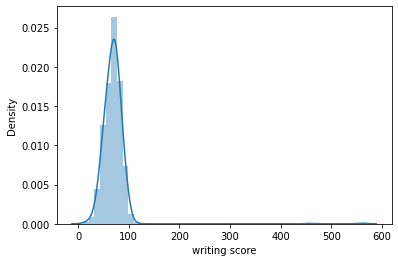

In [31]:
sns.distplot(data2['writing score'])

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

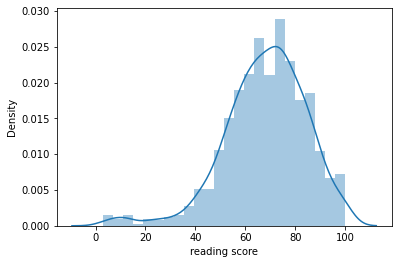

In [32]:
sns.distplot(data2['reading score'])

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

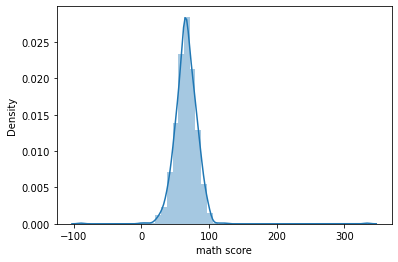

In [33]:
sns.distplot(data2['math score'])

In [34]:
num_cols = ['test preparation course', 'math score', 'reading score', 'writing score']

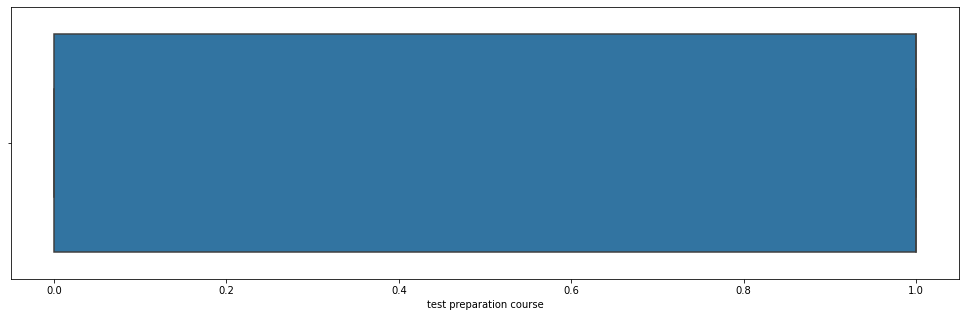

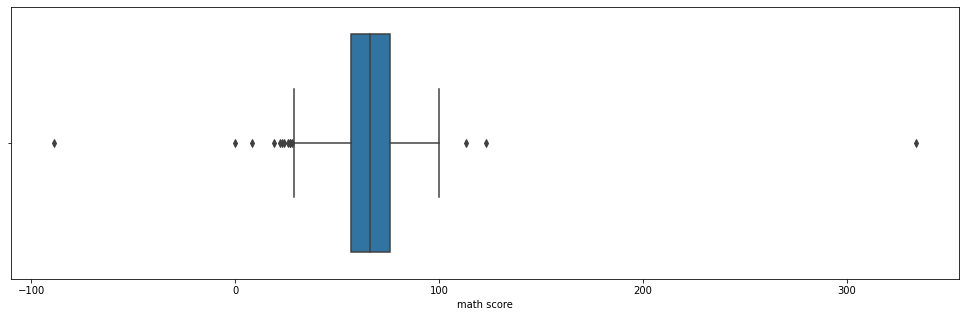

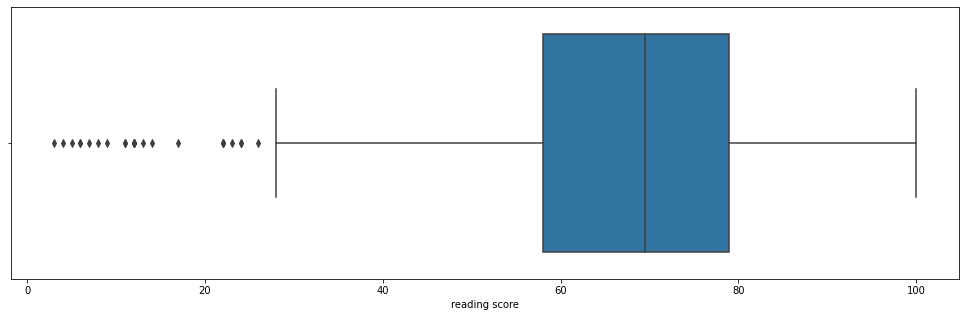

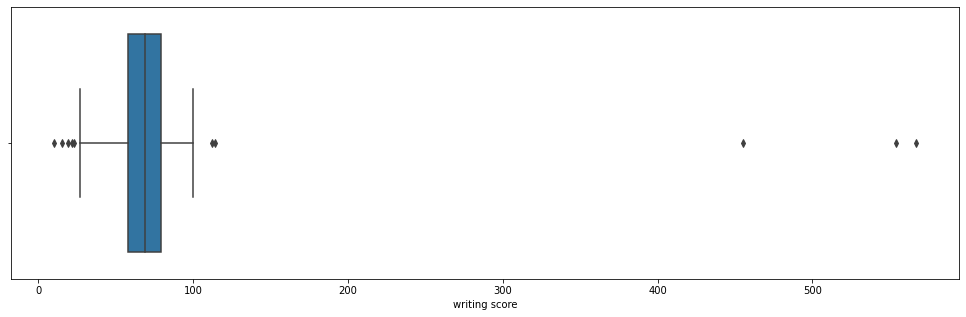

In [36]:
for col in num_cols : 
    plt.figure(figsize = (17,5))
    sns.boxplot(data=data2, x = col)

In [37]:
data2.dtypes

gender                          object
race/ethnicity                  object
parental level of education      int32
lunch                            int32
test preparation course          int32
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [38]:
### getting interquartile range (IQR) to get variation of outliers:
Q1=data2.quantile(0.25)
Q3=data2.quantile(0.75)
iq_range=Q3-Q1
iq_range

parental level of education     3.0
lunch                           1.0
test preparation course         1.0
math score                     19.0
reading score                  21.0
writing score                  21.0
dtype: float64

In [39]:
for i in ["math score", "reading score", "writing score"]:
    q1 = data2[i].quantile(0.25)
    q2 = data2[i].median()
    q3 = data2[i].quantile(0.75)

    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    lower_outliers = data2[i] < lower_limit
    upper_outliers = data2[i] > upper_limit

    data2[i] = data2[i][~(lower_outliers | upper_outliers)]
data2.dropna(inplace=True)

In [40]:
data2.shape

(960, 8)

<AxesSubplot:>

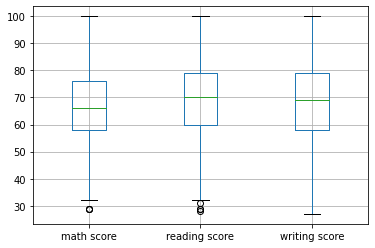

In [42]:
data2.boxplot(column=["math score", "reading score", "writing score"])

In [43]:
data3 =data2[["math score", "reading score", "writing score"]]

In [44]:
data3.describe()

,math score,reading score,writing score
count,960.000000,960.000000,960.000000
mean,66.598958,69.498958,68.490625
std,14.140093,14.079119,14.536421
min,29.000000,28.000000,27.000000
25%,58.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,76.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [45]:
dfzscore = (data3 - data3.mean()) / data3.std()
print(dfzscore.describe())

         math score  reading score  writing score
count  9.600000e+02   9.600000e+02   9.600000e+02
mean   3.312165e-16  -7.031412e-17   4.033810e-16
std    1.000000e+00   1.000000e+00   1.000000e+00
min   -2.659032e+00  -2.947554e+00  -2.854253e+00
25%   -6.081260e-01  -6.746842e-01  -7.216787e-01
50%   -4.235887e-02   3.558757e-02   3.504129e-02
75%    6.648501e-01   6.748321e-01   7.229686e-01
max    2.362151e+00   2.166403e+00   2.167616e+00


<AxesSubplot:>

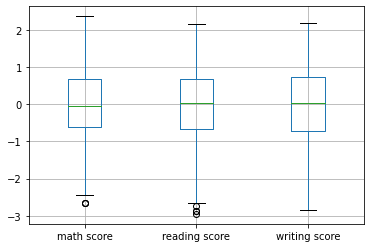

In [46]:
dfzscore.boxplot()

In [47]:
dfminmax = (data3 - data3.min()) / (data3.max() - data3.min())
print(dfminmax.describe())

       math score  reading score  writing score
count  960.000000     960.000000     960.000000
mean     0.529563       0.576374       0.568365
std      0.199156       0.195543       0.199129
min      0.000000       0.000000       0.000000
25%      0.408451       0.444444       0.424658
50%      0.521127       0.583333       0.575342
75%      0.661972       0.708333       0.712329
max      1.000000       1.000000       1.000000


<AxesSubplot:>

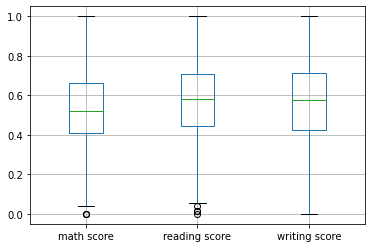

In [48]:
dfminmax.boxplot()

In [49]:
data3.head()

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0


In [74]:
### removing outliers using z-score.
### Any z-score greater than 3 or less than -3 is considered to be an outlier. 
from scipy import stats
numeric_columns=["math score", "reading score", "writing score"]
z=np.abs(stats.zscore(data2[numeric_columns]))
print(z)

threshold1=-3
threshold2=3

# print(np.where(((z>threshold1) & (z<threshold2)), z))
# print(np.where(((z>threshold1) & (z<threshold2))))
z[(z>threshold1) & (z<threshold2)]

     math score  reading score  writing score
0      0.318347       0.240745       0.153558
1      0.150502       1.328723       0.629496
2      1.325422       1.630939       0.799474
3      1.080367       0.665903       0.866309
4      0.542142       0.603404       0.187554
..          ...            ...            ...
995    1.213525       1.872711       0.867465
996    0.241138       0.786789       0.492358
997    0.408984       0.180302       0.152402
998    0.094553       0.603404       0.255545
999    0.598090       1.086950       0.561505

[1000 rows x 3 columns]


,math score,reading score,writing score
0,0.318347,0.240745,0.153558
1,0.150502,1.328723,0.629496
2,1.325422,1.630939,0.799474
3,1.080367,0.665903,0.866309
4,0.542142,0.603404,0.187554
...,...,...,...
995,1.213525,1.872711,0.867465
996,0.241138,0.786789,0.492358
997,0.408984,0.180302,0.152402
998,0.094553,0.603404,0.255545
